[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/pyinat/pyinaturalist/main?filepath=examples%2FData%2520Visualizations%2520-%2520Regional%2520Observation%2520Stats.ipynb)

# Regional observation stats

This example shows how to get some general statistics on all observations in a given region.
See https://www.inaturalist.org/places to find place IDs.

In [1]:
from time import sleep

import altair as alt
import pandas as pd
from pyinaturalist import (
    get_observation_identifiers,
    get_observation_observers,
    get_observation_species_counts,
    get_observations,
)
from pyinaturalist.constants import ICONIC_TAXA

# Adjustable values
PLACE_ID = 6
PLACE_NAME = 'Alaska'

### General stats
Total observations, unique taxa, identifiers, and observers

In [2]:
total_observations = get_observations(
    place_id=PLACE_ID,
    verifiable=True,
    per_page=0,
)['total_results']
print(f'Total observations: {total_observations}')

total_taxa = get_observation_species_counts(
    place_id=PLACE_ID,
    verifiable=True,
    per_page=0,
)['total_results']
print(f'Total taxa observed: {total_taxa}')

total_identifiers = get_observation_identifiers(place_id=PLACE_ID, per_page=0)['total_results']
print(f'Total identifiers: {total_identifiers}')

total_observers = get_observation_observers(place_id=PLACE_ID, per_page=0)['total_results']
print(f'Total observers: {total_observers}')

Total observations: 214729
Total taxa observed: 6559
Total identifiers: 5986
Total observers: 7843


### Stats by iconic taxon
Show a breakdown of observations and taxa observed for each of the iconic taxa (major species groups), using their corresponding icons on iNaturalist.
Here are a couple helper functions to make this easier:

In [3]:
THROTTLING_DELAY = 1.0  # Time to wait in between subsequent requests
TAXON_IMAGE_URL = 'https://raw.githubusercontent.com/inaturalist/inaturalist/main/app/assets/images/iconic_taxa/{taxon}-75px.png'
iconic_taxa = list(ICONIC_TAXA.values())
iconic_taxa.remove('Unknown')


# Run one search for each iconic taxon
def get_iconic_taxa_counts(function):
    iconic_taxa_counts = {}
    for taxon_name in iconic_taxa:
        total_taxon_observations = function(
            place_id=PLACE_ID,
            iconic_taxa=taxon_name,
            verifiable=True,
            per_page=0,
        )['total_results']

        iconic_taxa_counts[taxon_name] = total_taxon_observations
        print(f'Total results for {taxon_name}: {total_taxon_observations}')
        if taxon_name != iconic_taxa[-1]:
            sleep(THROTTLING_DELAY)
    return iconic_taxa_counts


def get_iconic_icon(taxon_name):
    return TAXON_IMAGE_URL.format(taxon=taxon_name.lower())

#### Observations
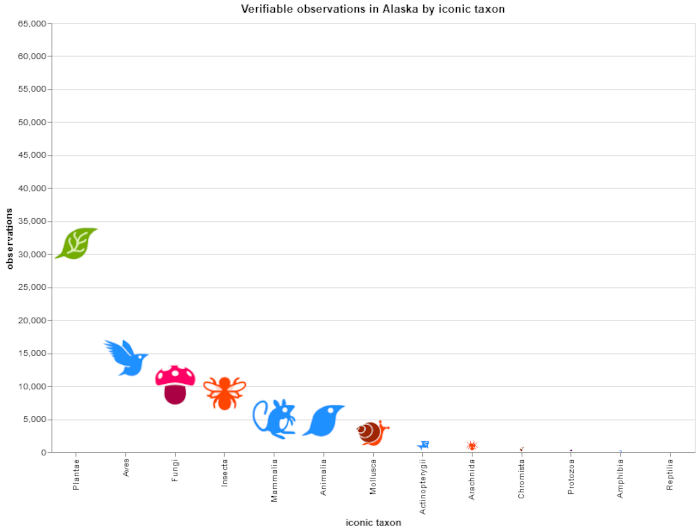

In [4]:
total_observations_by_iconic_taxon = get_iconic_taxa_counts(get_observations)

# Create a chart, sorted by number of observations, using the appropriate iNaturalist icons
observations_df = pd.DataFrame(
    [
        {'iconic taxon': k, 'observations': v, 'img': get_iconic_icon(k)}
        for k, v in total_observations_by_iconic_taxon.items()
    ]
)
alt.Chart(
    observations_df,
    title=f'Verifiable observations in {PLACE_NAME} by iconic taxon',
    width=750,
    height=500,
).mark_image().encode(x=alt.X('iconic taxon:N', sort='-y'), y='observations:Q', url='img')

Total results for Animalia: 12363
Total results for Aves: 35455
Total results for Amphibia: 499
Total results for Reptilia: 5
Total results for Mammalia: 12414
Total results for Actinopterygii: 3000
Total results for Mollusca: 7388
Total results for Arachnida: 2561
Total results for Insecta: 23230
Total results for Plantae: 87924
Total results for Fungi: 27291
Total results for Chromista: 1508
Total results for Protozoa: 689


alt.Chart(...)

#### Taxa
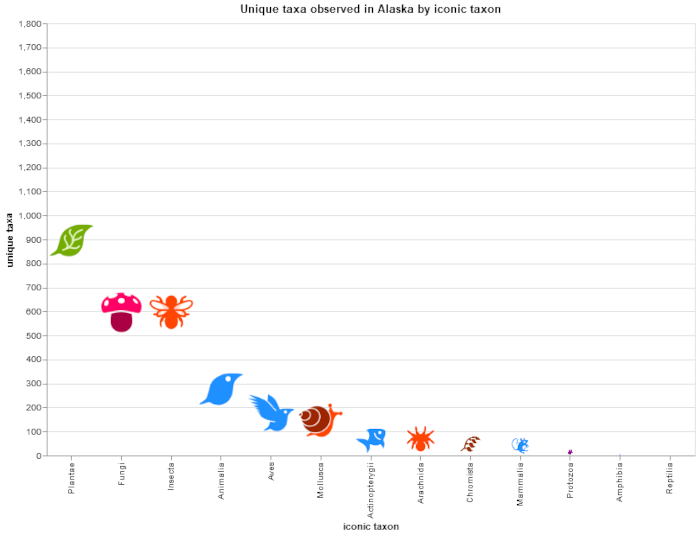

In [5]:
total_taxa_by_iconic_taxon = get_iconic_taxa_counts(get_observation_species_counts)

# Create a chart, sorted by number of observations, using the appropriate iNaturalist icons
taxa_df = pd.DataFrame(
    [
        {'iconic taxon': k, 'unique taxa': v, 'img': get_iconic_icon(k)}
        for k, v in total_taxa_by_iconic_taxon.items()
    ]
)
alt.Chart(
    taxa_df,
    title=f'Unique taxa observed in {PLACE_NAME} by iconic taxon',
    width=750,
    height=500,
).mark_image().encode(x=alt.X('iconic taxon:N', sort='-y'), y='unique taxa:Q', url='img')

Total results for Animalia: 604
Total results for Aves: 353
Total results for Amphibia: 7
Total results for Reptilia: 3
Total results for Mammalia: 87
Total results for Actinopterygii: 154
Total results for Mollusca: 311
Total results for Arachnida: 149
Total results for Insecta: 1368
Total results for Plantae: 1994
Total results for Fungi: 1324
Total results for Chromista: 156
Total results for Protozoa: 34


alt.Chart(...)